# Example to plot histograms in ipynb
Data that is used in the example below is generated using the code at the end of this notebook. But first we'll see an example how to plot histograms using data in csv format. Data from csv format is read using pandas.

In [8]:
# imports.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


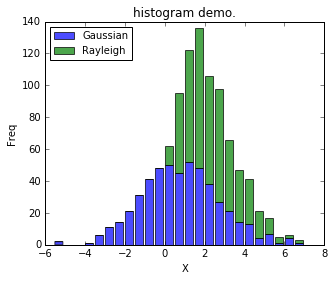

In [9]:
# read from csv file

plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
def read_and_plot_data(fname):

    df = pd.read_csv(fname)

    raw_data = df.values
    headers = df.columns.values

    num_bins = 25
    plt.hist(raw_data, num_bins, alpha=0.7, histtype='bar', stacked=True, label=list(headers))
    plt.legend(loc=2,prop={'size':10})


read_and_plot_data('data_file_0.csv')
plt.xlabel('X')
plt.ylabel('Freq')
plt.title('histogram demo.')
plt.show()

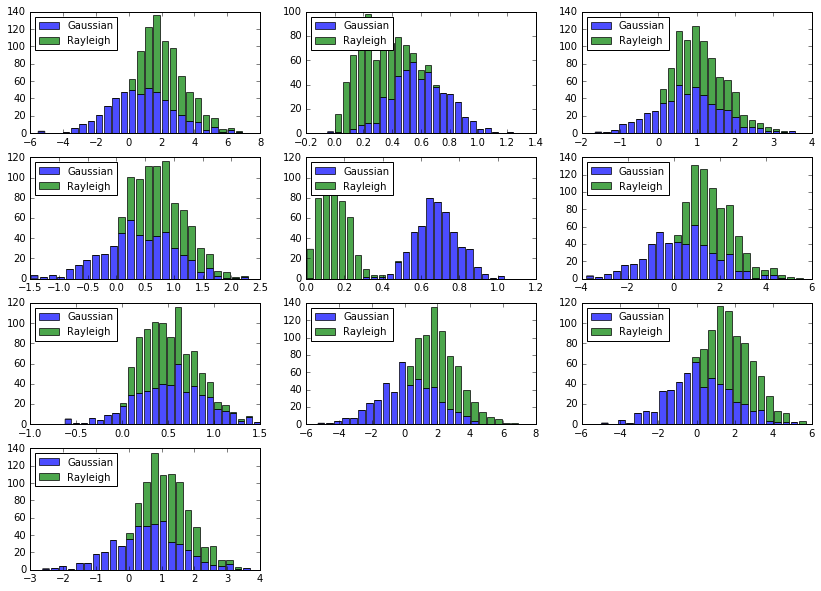

In [10]:
# process multiple files at once

import os
import re

# Get a list of all files and directories in the current directory. 
list_of_all_files_and_dirs = os.listdir('.')
list_of_all_data_files = []

# Use only the data_file_x.csv files for this example.
for fname in list_of_all_files_and_dirs:
    if re.search(r'data_file_\d*.csv', fname):
        list_of_all_data_files.append(fname)

num_data_files = len(list_of_all_data_files)

# Create a grid of subplots.
num_x = int(np.ceil(np.sqrt(num_data_files)))
num_y = int(np.floor(np.sqrt(num_data_files)))

# Change the size of the figure.
plt.rcParams['figure.figsize'] = (14.0, 10.0) # set default size of plots  

# Plot histogram for each data file
for idx in range(num_data_files):
    plt.subplot(num_x, num_y, idx+1)
    read_and_plot_data(list_of_all_data_files[idx])


plt.show()


        


## Generating data for the example above.
For the example above, we will just some standard distrbutions available in numpy.

In [ ]:
# imports
import random
import numpy as np
import pandas as pd

num_data_files = 10
vec_size = 500

mu = np.random.uniform(0, 1, num_data_files)
scale = np.random.uniform(0, 2, num_data_files)
labels = ['Gaussian', 'Rayleigh']
for n in xrange(num_data_files):
    
    vec_normal = np.random.normal(loc=mu[n], scale=scale[n], size=vec_size) #loc is mean. scale is std deviation.
    vec_rayleigh = np.random.rayleigh(scale=scale[n], size=vec_size) #scale here is the mode of the distribution.
    
    vec_data = np.stack([vec_normal, vec_rayleigh])
    df = pd.DataFrame(vec_data.T )
    
    df.to_csv('data_file_%d.csv'%n, header=labels, index=False)
    
print "Done."